In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from config import kiva_test

In [2]:
kiva_test.data.columns

Index(['index', 'loan_id', 'loan_name', 'original_language', 'description',
       'description_translated', 'funded_amount', 'loan_amount',
       'status_loans', 'image_id', 'video_id', 'activity_name', 'sector_name',
       'loan_use', 'country_code', 'country_name', 'town_name',
       'currency_policy', 'currency_exchange_coverage_rate', 'currency',
       'partner_id', 'posted_time', 'planned_expiration_time', 'disburse_time',
       'raised_time', 'lender_term', 'num_lenders_total',
       'num_journal_entries', 'num_bulk_entries', 'tags', 'borrower_names',
       'borrower_genders', 'borrower_pictured', 'repayment_interval',
       'distribution_model', 'posted_time_actual', 'disburse_time_actual',
       'raised_time_actual', 'disburse_to_posted_days',
       'posted_to_raised_days', 'disbursed_to_raised_days', 'name',
       'status_partners', 'rating', 'start_date', 'delinquency_rate',
       'default_rate', 'total_amount_raised', 'loans_posted',
       'delinquency_rate_not

In [11]:
kiva_test.data.posted_to_raised_days.describe()

count    1.336123e+06
mean     1.167474e+01
std      1.202441e+01
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.800000e+01
max      1.750000e+02
Name: posted_to_raised_days, dtype: float64

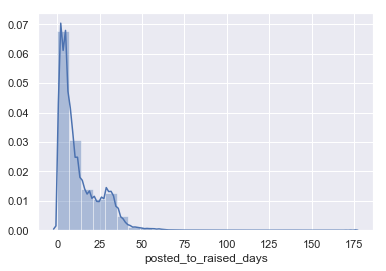

In [12]:
sns.distplot(kiva_test.data["posted_to_raised_days"], bins=25, kde=True)

In [3]:
#funded loans between 0 and 30 days
fl_subset_cl = kiva_test.data[kiva_test.data.posted_to_raised_days <= 30]

In [ ]:
#Creating variables
fl_subset_cl['description_count'] = fl_subset_cl['description'].str.len()
fl_subset_cl["video_bi"] = np.where(fl_subset_cl["video_id"].isnull() == True, 0, 1)
fl_subset_cl["image_bi"] = np.where(fl_subset_cl["image_id"].isnull() == True, 0, 1)
fl_subset_cl["tags_bi"] = np.where(fl_subset_cl["tags"].isnull() == True, 0, 1)
fl_subset_cl["names_bi"] = np.where(fl_subset_cl["borrower_names"].isnull() == True, 0, 1)
fl_subset_cl["repayment_interval_bi"] = np.where(fl_subset_cl["repayment_interval"] == "monthly", 0, 1)

In [ ]:
#Creating variable for Gender (from Tom's code)
fl_subset_cl['num_borrowers_female'] = fl_subset_cl['borrower_genders'].str.count('female')
fl_subset_cl['num_borrowers_male'] = fl_subset_cl['borrower_genders'].str.count('^male') + fl_subset_cl['borrower_genders'].str.count('\, male')
fl_subset_cl['num_borrowers'] = fl_subset_cl['num_borrowers_female']+fl_subset_cl['num_borrowers_male']
fl_subset_cl['num_borrowers_female_pct'] = (fl_subset_cl['num_borrowers_female']*1.00)/fl_subset_cl['num_borrowers']

In [10]:
fl_subset_cl["posted_to_raised_days"].describe()

count    1.202774e+06
mean     8.793134e+00
std      8.186783e+00
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.300000e+01
max      3.000000e+01
Name: posted_to_raised_days, dtype: float64

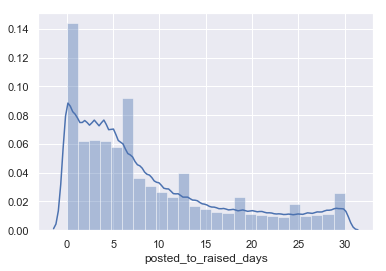

In [8]:
sns.distplot(fl_subset_cl["posted_to_raised_days"], bins=25, kde=True)